# Gráficos
de la evolución del sistema. Aquí se resumen una serie de gráficos útiles para analizar la dinámica del sistema, así como de partículas individuales

## Importo dependencias

In [1]:
#Importo librerías
import numpy as np
import matplotlib.pyplot as plt

#Agrego interactividad a los gráficos
%matplotlib ipympl


## Constantes adimensionales

In [2]:
#Constantes matemáticas
pi = np.pi

#Ctes físicas
m = 9.11e-31*1e3 #[g]
e = 1.602e-19*(1/3.336641e-10) #[Fr]
c = 299792458*1e2 #[cm/s]
K = 1.380649e-23*(1/1e-7) #constante de Boltzmann [ergio/K], obtenida de NIST

## Importo datos

In [3]:
# archivo_trayectorias = "resultados/trayectorias.npy"
# archivo_tiempos = "resultados/tiempos.npy"
# archivo_condiciones_iniciales = "resultados/condiciones_iniciales.npy"

# # archivo_trayectorias = "resultados/trayectorias_tgrande.npy"
# # archivo_tiempos = "resultados/tiempos_tgrande.npy"
# # archivo_condiciones_iniciales = "resultados/condiciones_iniciales_tgrande.npy"



# datos = np.load(archivo_trayectorias,allow_pickle=True)
# rx_vec, ry_vec, vx_vec, vy_vec, = datos[0], datos[1], datos[2], datos[3]

# tiempos = np.load(archivo_tiempos, allow_pickle=True)
# t, dt, n_pasos, guardo_cada = tiempos[0], tiempos[1], tiempos[2], tiempos[3]
# t_vec = np.arange(0, dt*n_pasos, guardo_cada*dt)

# cond_ini = np.load(archivo_condiciones_iniciales, allow_pickle = True)
# R0, v0, R0_dim, v0_dim = cond_ini[0], cond_ini[1], cond_ini[2], cond_ini[3]
# # alpha, beta, gamma, epsilon = cond_ini[2], cond_ini[3], cond_ini[4], cond_ini[5]
# # w_ae = cond_ini[6]
# # Pot_laser, w = cond_ini[7], cond_ini[8]

In [4]:
#Python
# name_files = ["py_cpu_pos_x.txt", "py_cpu_pos_y.txt", "py_cpu_vel_x.txt", "py_cpu_vel_y.txt", "py_cpu_t.txt", "py_cpu_cond_ini.txt"]

#C++ CPU
# name_files = ["cpp_cpu_pos_x.txt", "cpp_cpu_pos_y.txt", "cpp_cpu_vel_x.txt", "cpp_cpu_vel_y.txt", "cpp_cpu_t.txt", "cpp_cpu_cond_ini.txt"]

#C++ GPU
name_files = ["cpp_gpu_pos_x.txt", "cpp_gpu_pos_y.txt", "cpp_gpu_vel_x.txt", "cpp_gpu_vel_y.txt", "cpp_gpu_t.txt", "cpp_gpu_cond_ini.txt"]

#Leo los datos
[rx_vec, ry_vec, vx_vec, vy_vec, t_vec, cond_ini] = [np.loadtxt("resultados/" + name_files[i]) for i in range(len(name_files))]

#Asigno condiciones iniciales
R0, v0, R0_dim, v0_dim= cond_ini[0], cond_ini[1], cond_ini[2], cond_ini[3]
#Agregar N, dt TO-DO
N = len(rx_vec[0,:])
n_pasos = len(rx_vec[:,0])
dt = 0.001 

## Gráficos

### Trayectorias

#### Una partícula

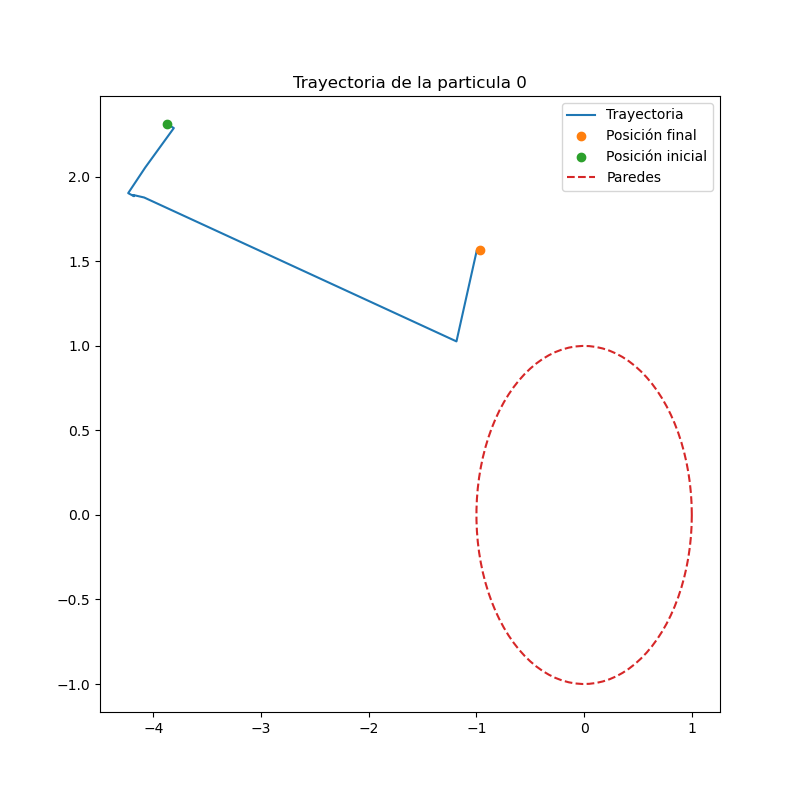

In [7]:
particula = 0

#Grafico
fig, ax = plt.subplots(figsize=(8,8))
index_ini = 0
index_fin = -1
# index_ini = 0
# index_fin = 1000
ax.plot(rx_vec[index_ini:index_fin,particula],ry_vec[index_ini: index_fin, particula],"-",label="Trayectoria")
ax.plot(rx_vec[-1,particula],ry_vec[-1, particula],"o",label="Posición final")
ax.plot(rx_vec[0,particula],ry_vec[0, particula],"o",label="Posición inicial")
ax.plot(R0*np.cos(np.linspace(0,2*pi,100)),R0*np.sin(np.linspace(0,2*pi,100)),"--",label="Paredes")
ax.legend()
ax.set_title(f"Trayectoria de la particula {particula}")
# ax.set_xlim([-R0*1.1,R0*1.1])
# ax.set_ylim([-R0*1.1, R0*1.1])
plt.show()


#### Todas las partículas

KeyboardInterrupt: 

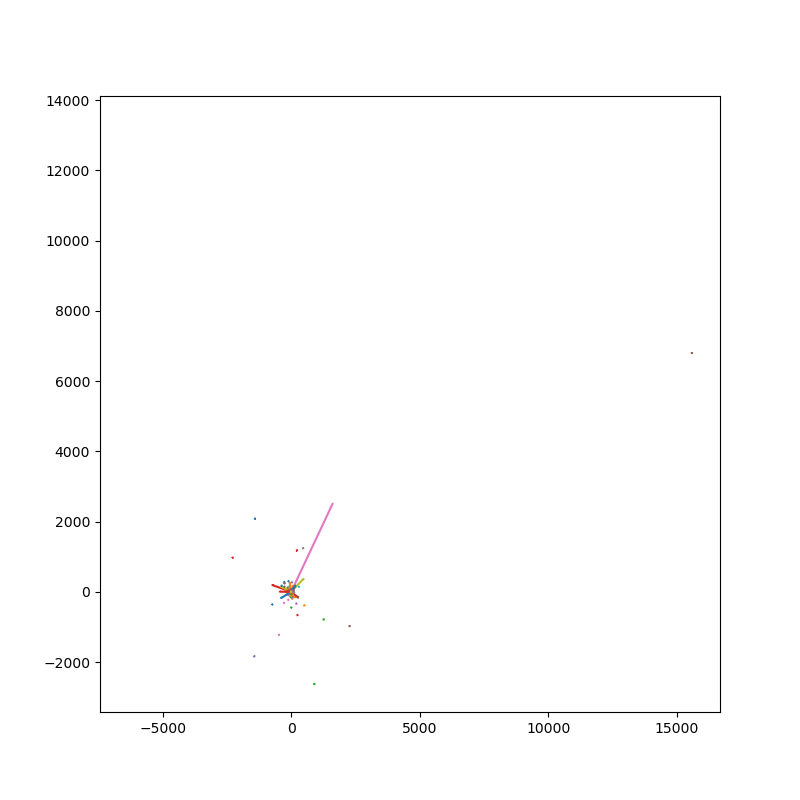

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
for i in range(N):
    ax.plot(rx_vec[:,i],ry_vec[:,i],"-")

ax.plot(R0*np.cos(np.linspace(0,2*pi,100)),R0*np.sin(np.linspace(0,2*pi,100)),"--",label="Paredes")
ax.set_title(f"Trayectoria de las particulas")
ax.set_xlim([-R0*1.1,R0*1.1])
ax.set_ylim([-R0*1.1, R0*1.1])
plt.show()


In [ ]:
# En caso de que alguna partícula diverja, la busco
# for i in range(len(rx_vec[0,:])):
#     rx_graph_i, ry_graph_i, vx_graph_i, vy_graph_i = trayectoria(rx_vec[:,i], ry_vec[:,i])
#     if np.any( rx_graph_i**2 + ry_graph_i**2 > R0**2 ):
#         print("Partícula", i, "diverge")

### Frecuencia de colisión

Calculo la frecuencia de colisión. Puede ser útil para determinar cuándo se ha llegado al equilibrio

In [ ]:
#Calculo la frecuencia de colisión con la pared
def freq_colisiones(t_total, rx_vec, ry_vec, vx_vec, vy_vec, particula):
    '''
    Calcula la frecuencia de colisiones de una partícula con la pared

    Parameters
    ----------
    t_total (float): Tiempo total de la simulación.
    rx_vec (ndarray): Posiciones en x de todas las partículas en cada tiempo.
    ry_vec (ndarray): Posiciones en y de todas las partículas en cada tiempo.
    vx_vec (ndarray): Velocidades en x de todas las partículas en cada tiempo.
    vy_vec (ndarray): Velocidades en y de todas las partículas en cada tiempo.
    particula (int): Número de la partícula a analizar.
    '''
    
    rx_graph, ry_graph, vx_graph, vy_graph = rx_vec[:,particula], ry_vec[:,particula], vx_vec[:,particula], vy_vec[:,particula]

    #Calculo la componente radial de la velocidad
    tita_vec = np.arctan2(ry_graph, rx_graph)
    v_radial = vx_graph*np.cos(tita_vec) + vy_graph*np.sin(tita_vec)

    #Calculo la frecuencia de colisión
    nro_colisiones = 0
    for i in range(len(rx_graph)-1):
        if v_radial[i]*v_radial[i+1] < 0: #Hubo un cambio de signo
            nro_colisiones += 1
            # print(f"Colisión a tiempo t = {dt*i}")
    return nro_colisiones/t_total

f = freq_colisiones(t_vec[-1], rx_vec, ry_vec, vx_vec, vy_vec, particula)

### Temperatura

In [ ]:
def Temperatura(vx_vec, vy_vec):
    '''
    Calcula la temperatura en cada instante de tiempo

    Parameters
    ----------
    vx_vec (ndarray): Velocidades en x de todas las partículas en cada tiempo.
    vy_vec (ndarray): Velocidades en y de todas las partículas en cada tiempo.

    Returns
    -------
    T_vec (ndarray): Temperatura en Kelvin [K] en cada instante de tiempo.
    
    '''
    T_vec = np.zeros(len(vx_vec[:,0]))
    factor = m/3/K*v0_dim**2
    for i in range(len(T_vec)):
        T_vec[i] = np.mean(vx_vec[i,:]**2 + vy_vec[i,:]**2)*factor

    return T_vec


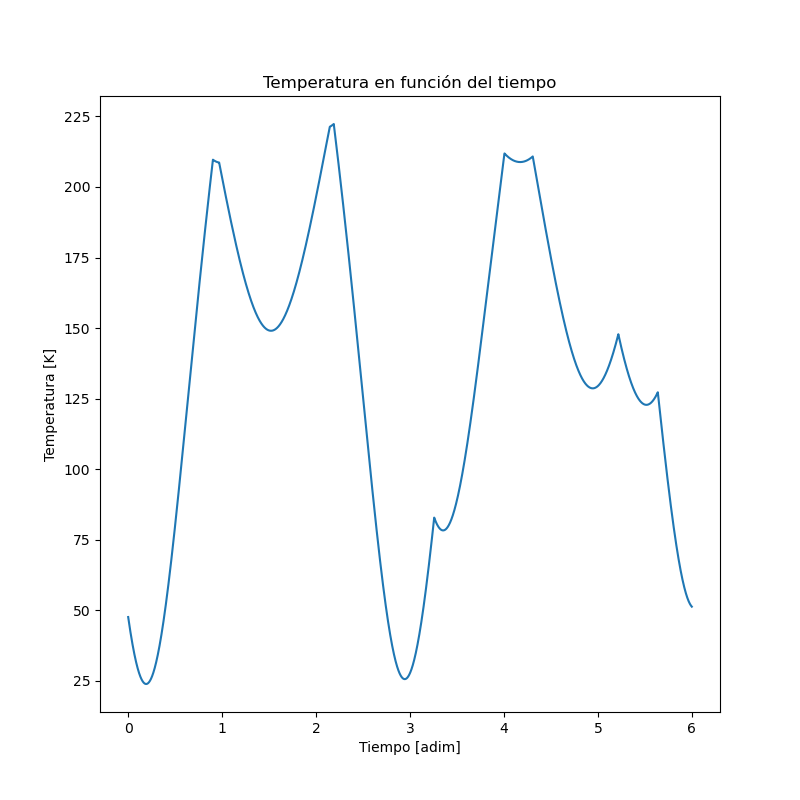

In [ ]:
#Grafico
T_vec = Temperatura(vx_vec, vy_vec)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(t_vec, T_vec)
ax.set_title("Temperatura en función del tiempo")
ax.set_xlabel("Tiempo [adim]")
ax.set_ylabel("Temperatura [K]")
plt.show()


### Densidad

Histograma de las posiciones de las partículas en 2D considerando todas las partículas en un instante de tiempo

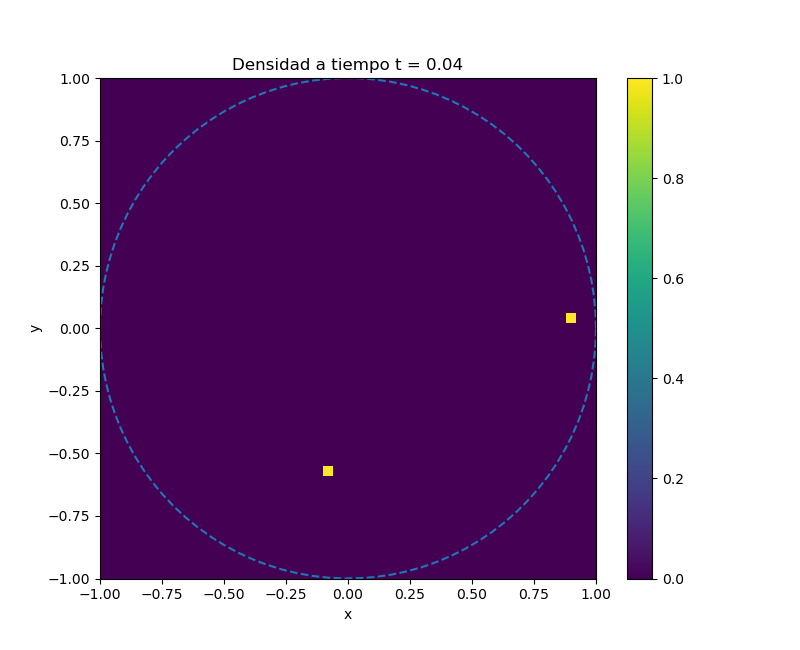

In [ ]:
t_index = 40

#Defino el binning
bins = np.linspace(-R0,R0,50)
#Defino el histograma
hist, xedges, yedges = np.histogram2d(rx_vec[t_index, :], ry_vec[t_index, :], bins=bins)

#Defino el grid
xgrid, ygrid = np.meshgrid(xedges, yedges)
#Grafico
fig, ax = plt.subplots(figsize=(8,6.5))
#Agrego círculo de radio R0
ax.plot(R0*np.cos(np.linspace(0,2*pi,100)),R0*np.sin(np.linspace(0,2*pi,100)),"--",label="Paredes")
ax.pcolormesh(xgrid, ygrid, hist.T)
ax.set_title(f"Densidad a tiempo t = {dt*t_index}")
ax.set_xlabel("x")
ax.set_ylabel("y")
#Barra de color
cbar = fig.colorbar(ax.pcolormesh(xgrid, ygrid, hist.T))

plt.show()


In [ ]:
#Hago una animación del histograma anterior en el tiempo
# from matplotlib import animation

# def animate(i):
#     hist, xedges, yedges = np.histogram2d(rx_vec[i, :], ry_vec[i, :], bins=bins)
#     hist[hist >threshold] = 0
#     ax.clear()
#     ax.plot(R0*np.cos(np.linspace(0,2*pi,100)),R0*np.sin(np.linspace(0,2*pi,100)),"--",label="Paredes")
#     ax.pcolormesh(xgrid, ygrid, hist.T)
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
#     ax.set_title("Tiempo = "+str(i))
#     return ax

# print("t0 = ", 0, "\nt_max = ", len(rx_vec[:,0]))

# fig, ax = plt.subplots(figsize=(8,7.5))
# anim = animation.FuncAnimation(fig, animate, frames=len(rx_vec[:,0]), interval=100, blit=False)
# plt.show()


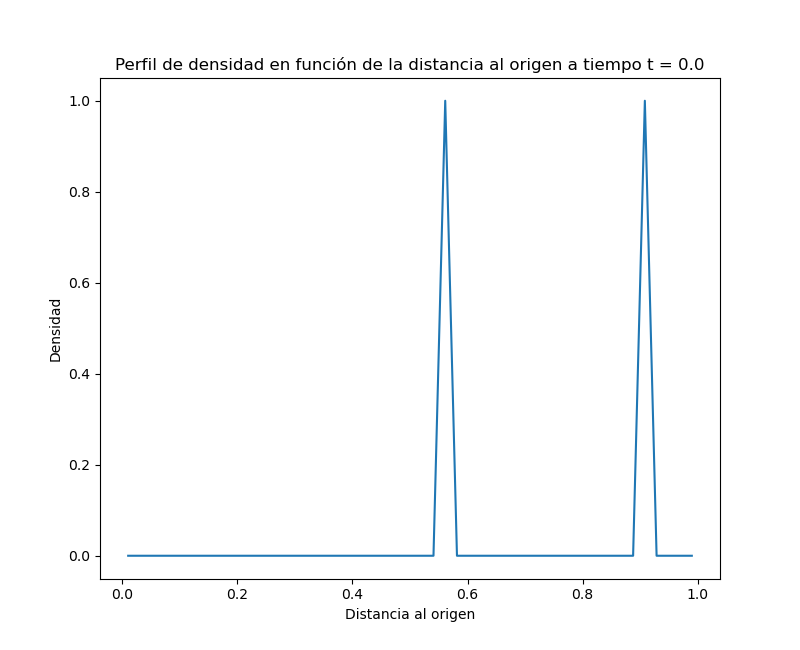

In [ ]:
#Grafico el perfil de densidad a un tiempo dado en función de la distancia al origen
t_index = 0


distancias = np.sqrt(rx_vec[t_index,:]**2 + ry_vec[t_index,:]**2)

#Defino el binning
bins = np.linspace(0,R0,50)
#Defino el histograma
hist, xedges = np.histogram(distancias, bins=bins)
#Elimino los datos del origen
hist[0] = 0
#Defino el grid
xgrid = xedges[:-1] + (xedges[1] - xedges[0])/2
#Grafico
fig, ax = plt.subplots(figsize=(8,6.5))
ax.plot(xgrid, hist)
ax.set_title(f"Perfil de densidad en función de la distancia al origen a tiempo t = {t_index*dt}")
ax.set_xlabel("Distancia al origen")
ax.set_ylabel("Densidad")
plt.show()



### Energía

In [ ]:
def E_pot_i_dim(r_i, rx_vec, ry_vec, R0_dim):
    '''
    Calcula el potencial dimensional en r dadas las posiciones de todas las partículas r_vec y sus cargas adimensionales

    Calcula en r
    Parameters
    ----------

    Returns
    -------
    
    '''
    rx_i = r_i[0]
    ry_i = r_i[1]

    numerador = 1
    denominador = R0_dim*np.sqrt((rx_vec-rx_i)**2 + (ry_vec - ry_i)**2) #distancias
    denominador = denominador[rx_i != rx_vec]

    return e**2*np.sum(numerador/denominador)


def E_cin_i_dim(v_i, v0_dim):
    '''
    Calcula la energía cinética dimensional de la partícula i con velocidad v_i
    
    '''
    vx = v_i[0]
    vy = v_i[1]
    return 1/2*m*v0_dim**2*(vx**2 + vy**2)

def E_total_i_dim(r_i, v_i, rx_vec, ry_vec, v0_dim, R0_dim):
    '''
    Calcula la energía total dimensional en r dadas las posiciones de todas las partículas rx_vec y ry_vec y sus cargas adimensionales
    
    Parameters
    ----------

    Returns
    -------
    
    '''

    return E_cin_i_dim(v_i, v0_dim) + E_pot_i_dim(r_i, rx_vec, ry_vec, R0_dim)

def E_total_dim(rx_vec, ry_vec, vx_vec, vy_vec, v0_dim, R0_dim):
    '''
    Calculo la energía total del sistema
    '''
    E_cin, E_pot = 0, 0
    for i in range(N):
        r_i = np.array([rx_vec[i], ry_vec[i]])
        v_i = np.array([vx_vec[i], vy_vec[i]])
        E_cin += E_cin_i_dim(v_i, v0_dim)
        E_pot += E_pot_i_dim(r_i, rx_vec, ry_vec, R0_dim)

    E_total = E_cin + E_pot/2 #Tengo que dividir por 2 porque consideré cada interacción 2 veces
    
    return E_total, E_cin, E_pot/2


In [ ]:
#Energía de la partícula anterior en el tiempo

E_total_dim_vec = np.zeros(n_pasos)
E_cin_dim_vec = np.zeros(n_pasos)
E_pot_dim_vec = np.zeros(n_pasos)

for t in range(n_pasos):    
    E_total_dim_vec[t], E_cin_dim_vec[t], E_pot_dim_vec[t] = E_total_dim(rx_vec[t], ry_vec[t], vx_vec[t], vy_vec[t], v0_dim, R0_dim)
    #Imprimo porcentaje del for
    if t%(n_pasos//50) == 0:
        print("Porcentaje = ", t/n_pasos*100, "%")
        
        

Porcentaje =  0.0 %
Porcentaje =  2.0 %
Porcentaje =  4.0 %
Porcentaje =  6.0 %
Porcentaje =  8.0 %
Porcentaje =  10.0 %
Porcentaje =  12.0 %
Porcentaje =  14.000000000000002 %
Porcentaje =  16.0 %
Porcentaje =  18.0 %
Porcentaje =  20.0 %
Porcentaje =  22.0 %
Porcentaje =  24.0 %
Porcentaje =  26.0 %
Porcentaje =  28.000000000000004 %
Porcentaje =  30.0 %
Porcentaje =  32.0 %
Porcentaje =  34.0 %
Porcentaje =  36.0 %
Porcentaje =  38.0 %
Porcentaje =  40.0 %
Porcentaje =  42.0 %
Porcentaje =  44.0 %
Porcentaje =  46.0 %
Porcentaje =  48.0 %
Porcentaje =  50.0 %
Porcentaje =  52.0 %
Porcentaje =  54.0 %
Porcentaje =  56.00000000000001 %
Porcentaje =  57.99999999999999 %
Porcentaje =  60.0 %
Porcentaje =  62.0 %
Porcentaje =  64.0 %
Porcentaje =  66.0 %
Porcentaje =  68.0 %
Porcentaje =  70.0 %
Porcentaje =  72.0 %
Porcentaje =  74.0 %
Porcentaje =  76.0 %
Porcentaje =  78.0 %
Porcentaje =  80.0 %
Porcentaje =  82.0 %
Porcentaje =  84.0 %
Porcentaje =  86.0 %
Porcentaje =  88.0 %
Porcen

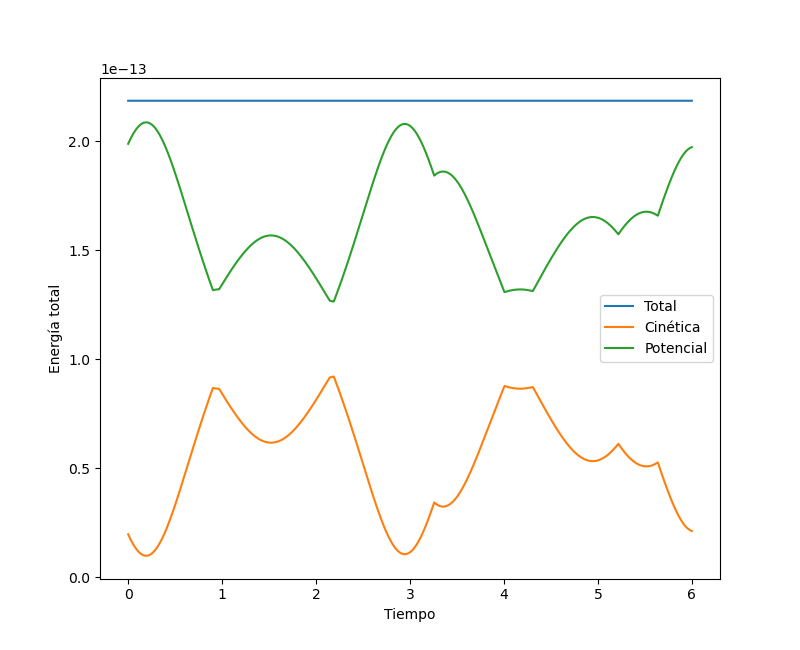

In [ ]:
#Grafico
fig, ax = plt.subplots(figsize=(8,6.5))
ax.plot(t_vec, E_total_dim_vec, label = "Total")
ax.plot(t_vec, E_cin_dim_vec, label = "Cinética")
ax.plot(t_vec, E_pot_dim_vec, label = "Potencial")
ax.legend()
ax.set_xlabel("Tiempo")
ax.set_ylabel("Energía total")

plt.show()

#### Conservación de la energía

Pendiente adimensionalizada: -1.0485374780769106e-06 +/- 1.468910215844252e-08
La energía se conserva


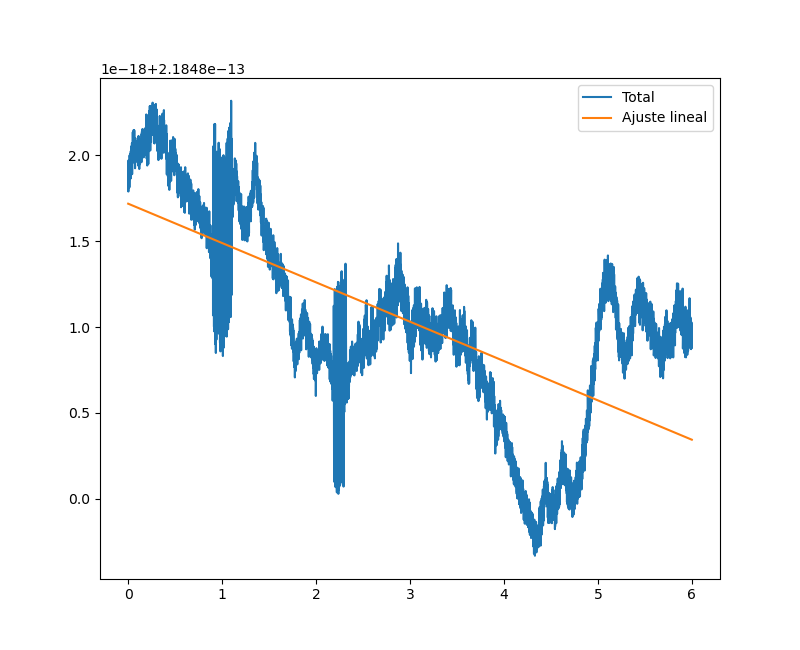

In [ ]:
#Ajuste lineal de E_total_dim_vec
#Importo curve_fit
from scipy.optimize import curve_fit
#Defino la función a ajustar
def f(t, a, b):
    return a*t + b

#Defino los parámetros iniciales
a0 = 0
b0 = E_total_dim_vec[0]

#Ajusto
popt, pcov = curve_fit(f, t_vec, E_total_dim_vec, p0 = [a0, b0])

#Calculo los errores
perr = np.sqrt(np.diag(pcov))
print(f"Pendiente adimensionalizada: {popt[0]/popt[1]} +/- {perr[0]/popt[1]}")

if abs(popt[0]/popt[1]) < 1e-4:
    print("La energía se conserva")
else:
    print("La energía no se conserva")

#Grafico
fig, ax = plt.subplots(figsize=(8,6.5))
ax.plot(t_vec, E_total_dim_vec, label = "Total")
ax.plot(t_vec, f(t_vec, *popt), label = "Ajuste lineal")
ax.legend()
plt.show()

# 5.9616574401656386e-05 